# Natural Language Processing Course End Project

Input dataset:
https://docs.google.com/spreadsheets/d/1oY7aXafWfNCrBZwk8Lb6_m2rdDpFotaD/edit?gid=1510589720#gid=1510589720

banking_complaints_2023.csv

Carllos Watts-Nogueira

Due Aug 23 by 12:59am

# Load the data

In [2]:
# import pandas
import pandas as pd

In [3]:
# Read data in python environment.
df = pd.read_csv('banking_complaints_2023.csv')

In [4]:
df.head()

,Complaint ID,Date Received,Banking Product,Issue ID,Complaint Description,State,ZIP,Bank Response
0,CID76118977,1/1/2023,Checking or savings account,I_3510635,on XX/XX/XX22 I opened a safe balance account ...,California,92311,Closed with monetary relief
1,CID98703933,1/1/2023,"Credit reporting, credit repair services, or o...",I_3798538,There is an item from Bank of ABC on my credit...,California,91344,Closed with explanation
2,CID52036665,1/1/2023,Checking or savings account,I_3648593,On XX/XX/XX22 I found out that my account was ...,New York,10466,Closed with monetary relief
3,CID62581335,1/1/2023,Credit card or prepaid card,I_6999080,I've had a credit card for years with Bank of ...,California,92127,Closed with monetary relief
4,CID65731164,1/1/2023,Checking or savings account,I_3648593,This issue has to do with the way that Bank of...,New Jersey,7946,Closed with explanation


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7011 entries, 0 to 7010
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Complaint ID           7011 non-null   object
 1   Date Received          7011 non-null   object
 2   Banking Product        7011 non-null   object
 3   Issue ID               7011 non-null   object
 4   Complaint Description  7011 non-null   object
 5   State                  6984 non-null   object
 6   ZIP                    6981 non-null   object
 7   Bank Response          7011 non-null   object
dtypes: object(8)
memory usage: 438.3+ KB


In [6]:
df.isnull().sum()

,0
Complaint ID,0
Date Received,0
Banking Product,0
Issue ID,0
Complaint Description,0
State,27
ZIP,30
Bank Response,0


In [7]:
df.duplicated().sum()

np.int64(0)

## Handling Missing Values + Explanation
- Fill missing values in 'State' and 'ZIP' to preserve all records
- Explanation: Although these columns are not used directly in modeling,
- they may be useful later for geographic or time-based analysis (e.g., complaint trends by state)

In [8]:
df['State'] = df['State'].fillna('Unknown')
df['ZIP'] = df['ZIP'].fillna('00000')

## Install / Imports / Download

In [9]:
# Install required packages (only once; skip if already installed)
# NLTK (Natural Language Toolkit) is a Python library for teaching and working with human language data, offering tools for tokenization, tagging, and parsing.
!pip install nltk

In [10]:
# Import necessary packages
import nltk
from nltk.tokenize import sent_tokenize

In [11]:
# Import Required Libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Download required NLTK data
nltk.download('punkt')  # Sentence tokenizer
nltk.download('words')  # English word list
nltk.download('stopwords')  # Common stopwords
nltk.download('wordnet')  # WordNet lexical database
nltk.download('punkt_tab') # Download punkt_tab resource

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [13]:
# Import WordNet, a lexical database used for lemmatization and semantic analysis
from nltk.corpus import wordnet

# Import a list of common English stopwords (e.g., "the", "and", "is") used for filtering out non-informative words
from nltk.corpus import stopwords

In [14]:
import re                # Import the regular expressions module for pattern-based text cleaning (e.g., removing punctuation) (regular expressions)
import string            # Import the string module to access common string constants like punctuation (punctuation and character sets)
from nltk.stem import WordNetLemmatizer  # lemmatizer class

# Find the date range

Check if the variables have correct datatypes. Make changes wherever necessary.
Find the date range

In [15]:
# Fix date column
df["Date Received"] = pd.to_datetime(df["Date Received"], errors="coerce")

In [16]:
# Check date range
print("Date range:", df["Date Received"].min(), "to", df["Date Received"].max())

Date range: 2023-01-01 00:00:00 to 2023-10-21 00:00:00


# Convert text to lowercase / Remove numbers / Remove stopwords / Remove punctuation / Apply lemmatization

In [17]:
df.columns

Index(['Complaint ID', 'Date Received', 'Banking Product', 'Issue ID',
       'Complaint Description', 'State', 'ZIP', 'Bank Response'],
      dtype='object')

In [18]:
# Define a function named preprocessing that executes the following series of pre-processing steps in order:
# Convert text to lowercase / Remove numbers / Remove stopwords / Remove punctuation / Apply lemmatization
# Clean the text under ‘Complaint Description’ using the above function

# Define preprocessing function
def preprocess_text(text):
    text = text.lower() # 1. Convert to lowercase
    text = re.sub(r'\d+', '', text) # 2. Remove numbers
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text) # 3. Remove punctuation
    tokens = nltk.word_tokenize(text) # 4. Tokenize into words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stopwords.words('english')] # 5. Remove stopwords + lemmatize
    return " ".join(tokens) # 6. Rejoin cleaned tokens into a string


# Apply to complaint descriptions
df["Complaint_Clean"] = df["Complaint Description"].apply(preprocess_text)
# cleaning function to every row in the Complaint Description column and stores the result in a new column called Complaint_Clean

In [19]:
# df.drop(columns=["Complaint Description"], inplace=True) NoT used

# Convert the pre-processed text into a matrix of TF-IDF features for downstream modelling.

In [20]:
# Text Feature Engineering (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df["Complaint_Clean"])

# classification model (Department Prediction) --> Banking Product


Naive Bayes Classification Report:
                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.00      0.00      0.00        48
                                                 Checking or savings account       0.49      0.94      0.64       350
                                                               Consumer Loan       0.00      0.00      0.00        18
                                                                 Credit card       0.75      0.05      0.09        66
                                                 Credit card or prepaid card       0.45      0.56      0.50       237
                                                            Credit reporting       0.77      0.54      0.63        93
Credit reporting, credit repair services, or other personal consumer reports       0.78      0.28      0.41       125
                    

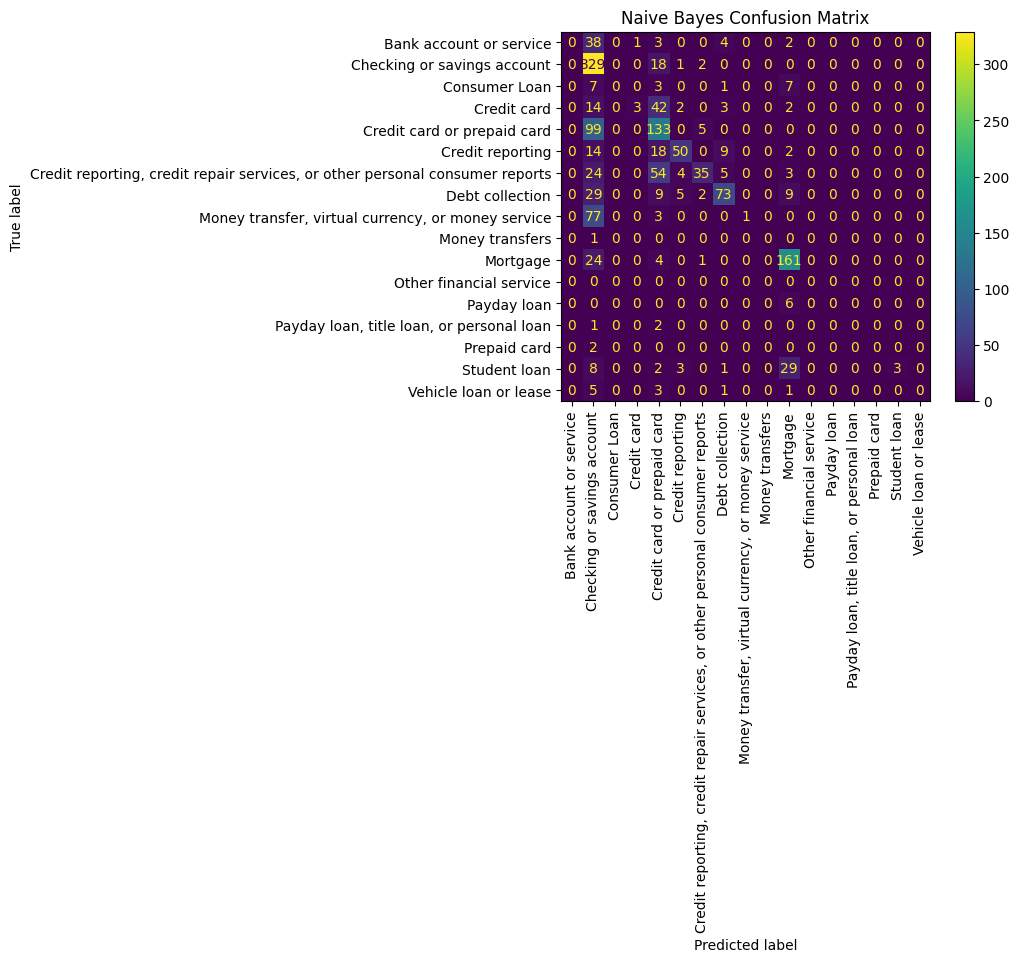

Logistic Regression Classification Report:
                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.60      0.69      0.64        48
                                                 Checking or savings account       0.81      0.66      0.73       350
                                                               Consumer Loan       0.41      0.67      0.51        18
                                                                 Credit card       0.66      0.76      0.70        66
                                                 Credit card or prepaid card       0.73      0.65      0.69       237
                                                            Credit reporting       0.65      0.80      0.72        93
Credit reporting, credit repair services, or other personal consumer reports       0.70      0.69      0.70       125
            

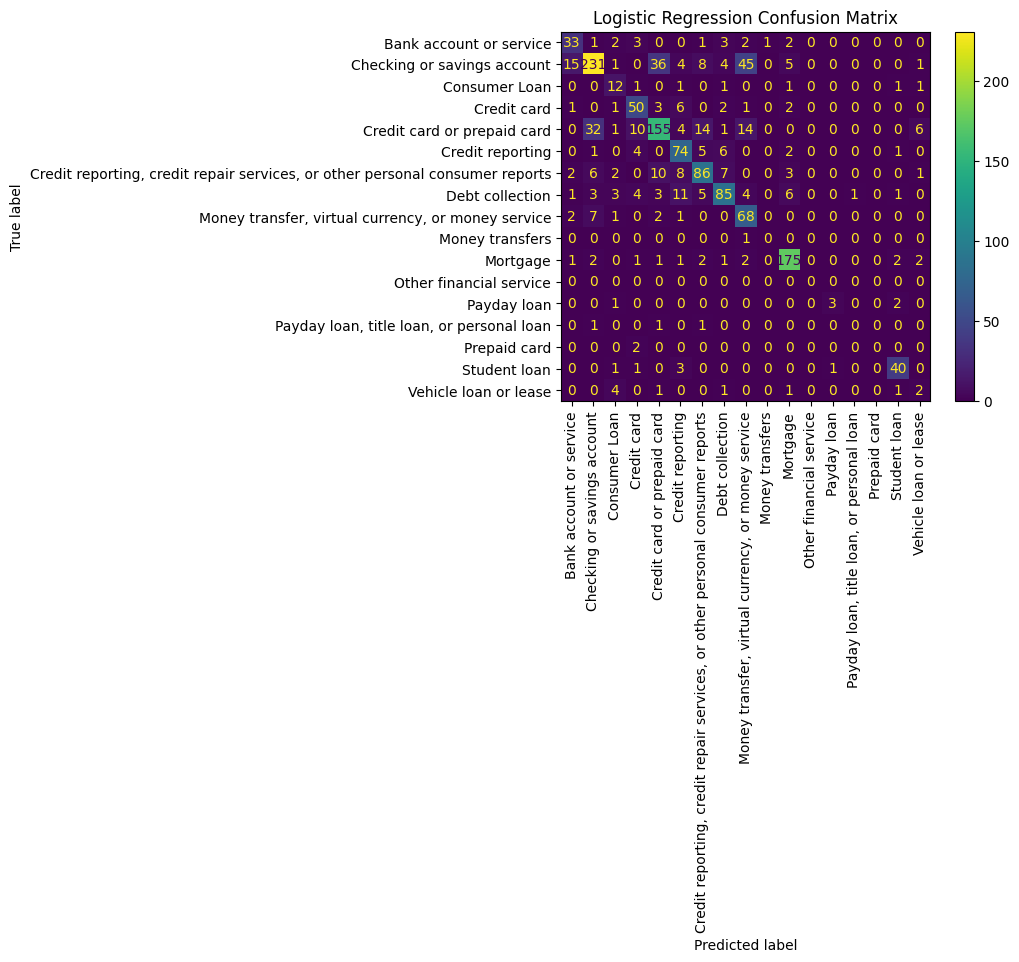

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Split data: Target is 'Banking Product'
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df["Banking Product"], test_size=0.2, random_state=42)

# --- Naive Bayes ---
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)

print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_preds, zero_division=0))

# Confusion Matrix for Naive Bayes
nb_cm = confusion_matrix(y_test, nb_preds, labels=nb.classes_)
nb_disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=nb.classes_)
nb_disp.plot(xticks_rotation=90)
plt.title("Naive Bayes Confusion Matrix")
plt.show()

# --- Logistic Regression ---
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')  # Optional: handle class imbalance
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_preds, zero_division=0))

# Confusion Matrix for Logistic Regression
logreg_cm = confusion_matrix(y_test, logreg_preds, labels=logreg.classes_)
logreg_disp = ConfusionMatrixDisplay(confusion_matrix=logreg_cm, display_labels=logreg.classes_)
logreg_disp.plot(xticks_rotation=90)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [22]:
# save the modal
import joblib
joblib.dump(nb, 'nb_model.pkl')

['nb_model.pkl']

# Sentiment Analysis with VADER

Use SentimentIntensityAnalyzer =  

- To predict sentiments from the complaints.
- The SentimentIntensityAnalyzer is a class from the vaderSentiment
- - library designed for sentiment analysis.


It evaluates text to determine the sentiment scores across four categories:
> positive, negative, neutral, and compound

The compound score is a normalized value between:
-  -1 (most extreme negative) and +1 (most extreme positive), providing an overall sentiment rating.

This analyzer is particularly effective for social media and other informal texts, as it can interpret emoticons, acronyms, and slang.

It is widely used for tasks like sentiment classification, opinion mining, and customer feedback analysis. Its ease of use and accuracy make it a valuable tool in NLP.

In [23]:
!pip install vaderSentiment
# Using VADER sentiment
# install package

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.4 MB/s eta 0:00:00


In [24]:
# import sentiment analyzer from vader sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [25]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)["compound"]
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["Complaint Description"].apply(get_sentiment) # not need the data clean

# View sentiment distribution
print(df["sentiment"].value_counts())

sentiment
Negative    3820
Positive    2874
Neutral      317
Name: count, dtype: int64


In [26]:
df.head()

,Complaint ID,Date Received,Banking Product,Issue ID,Complaint Description,State,ZIP,Bank Response,Complaint_Clean,sentiment
0,CID76118977,2023-01-01,Checking or savings account,I_3510635,on XX/XX/XX22 I opened a safe balance account ...,California,92311,Closed with monetary relief,xxxxxx opened safe balance account online usin...,Negative
1,CID98703933,2023-01-01,"Credit reporting, credit repair services, or o...",I_3798538,There is an item from Bank of ABC on my credit...,California,91344,Closed with explanation,item bank abc credit report belong must remove...,Negative
2,CID52036665,2023-01-01,Checking or savings account,I_3648593,On XX/XX/XX22 I found out that my account was ...,New York,10466,Closed with monetary relief,xxxxxx found account frozen apparent reason we...,Negative
3,CID62581335,2023-01-01,Credit card or prepaid card,I_6999080,I've had a credit card for years with Bank of ...,California,92127,Closed with monetary relief,ive credit card year bank abc xxxxxxxx paid ba...,Negative
4,CID65731164,2023-01-01,Checking or savings account,I_3648593,This issue has to do with the way that Bank of...,New Jersey,7946,Closed with explanation,issue way bank abc account linking bill pay pa...,Positive


In [27]:
# save df new column --> sentiment
df.to_csv("banking_complaints_2023_sentiment.csv", index=False)

# Business Insights

In [28]:
# How can the score be used by the bank? Share your insights.

# Group by sentiment and banking product
insights = df.groupby(["Banking Product", "sentiment"]).size().unstack().fillna(0)

insights

sentiment,Negative,Neutral,Positive
Banking Product,,,
Bank account or service,152.0,2.0,102.0
Checking or savings account,1098.0,98.0,459.0
Consumer Loan,39.0,0.0,44.0
Credit card,143.0,10.0,206.0
Credit card or prepaid card,635.0,32.0,566.0
Credit reporting,224.0,29.0,297.0
"Credit reporting, credit repair services, or other personal consumer reports",232.0,27.0,300.0
Debt collection,455.0,45.0,248.0
"Money transfer, virtual currency, or money service",274.0,18.0,119.0


In [29]:
insights["Total"] = insights["Negative"] + insights["Neutral"] + insights["Positive"]
insights

sentiment,Negative,Neutral,Positive,Total
Banking Product,,,,
Bank account or service,152.0,2.0,102.0,256.0
Checking or savings account,1098.0,98.0,459.0,1655.0
Consumer Loan,39.0,0.0,44.0,83.0
Credit card,143.0,10.0,206.0,359.0
Credit card or prepaid card,635.0,32.0,566.0,1233.0
Credit reporting,224.0,29.0,297.0,550.0
"Credit reporting, credit repair services, or other personal consumer reports",232.0,27.0,300.0,559.0
Debt collection,455.0,45.0,248.0,748.0
"Money transfer, virtual currency, or money service",274.0,18.0,119.0,411.0


In [30]:
high_negative = insights[insights["Negative"] > 400][["Negative", "Positive", "Neutral"]]
print("Products with High Negative Sentiment")
print(high_negative.to_markdown())

Products with High Negative Sentiment
| Banking Product             |   Negative |   Positive |   Neutral |
|:----------------------------|-----------:|-----------:|----------:|
| Checking or savings account |       1098 |        459 |        98 |
| Credit card or prepaid card |        635 |        566 |        32 |
| Debt collection             |        455 |        248 |        45 |
| Mortgage                    |        428 |        383 |        37 |


In [31]:
positive_over_negative = insights[insights["Positive"] > insights["Negative"]][["Positive", "Negative"]]
positive_over_negative["Comparison"] = positive_over_negative["Positive"].astype(int).astype(str) + " vs. " + positive_over_negative["Negative"].astype(int).astype(str)
print("\nProducts with High Positive Sentiment")
print(positive_over_negative[["Comparison"]].to_markdown())


Products with High Positive Sentiment
| Banking Product                                                              | Comparison   |
|:-----------------------------------------------------------------------------|:-------------|
| Consumer Loan                                                                | 44 vs. 39    |
| Credit card                                                                  | 206 vs. 143  |
| Credit reporting                                                             | 297 vs. 224  |
| Credit reporting, credit repair services, or other personal consumer reports | 300 vs. 232  |
| Payday loan                                                                  | 15 vs. 11    |
| Payday loan, title loan, or personal loan                                    | 9 vs. 4      |
| Student loan                                                                 | 104 vs. 88   |
| Vehicle loan or lease                                                        | 17 vs. 16    |


In [32]:
low_volume_high_neg = insights[(insights["Total"] <= 15) & (insights["Negative"] / insights["Total"] > 0.6)][["Negative", "Total"]]
print("\nProducts with Low Volume but High Negativity")
print(low_volume_high_neg.to_markdown())


Products with Low Volume but High Negativity
| Banking Product         |   Negative |   Total |
|:------------------------|-----------:|--------:|
| Money transfers         |          9 |      11 |
| Other financial service |          1 |       1 |


## save readme

In [33]:
with open("sentiment_insights.md", "w") as f:
    f.write("# Sentiment Insights by Product\n\n")

    f.write("Products with High Negative Sentiment\n")
    f.write(high_negative.to_markdown())
    f.write("\n\nProducts with High Positive Sentiment\n")
    f.write(positive_over_negative[["Comparison"]].to_markdown())
    f.write("\n\nProducts with Low Volume but High Negativity\n")
    f.write(low_volume_high_neg.to_markdown())

## plots

In [34]:
import matplotlib.pyplot as plt
import numpy as np

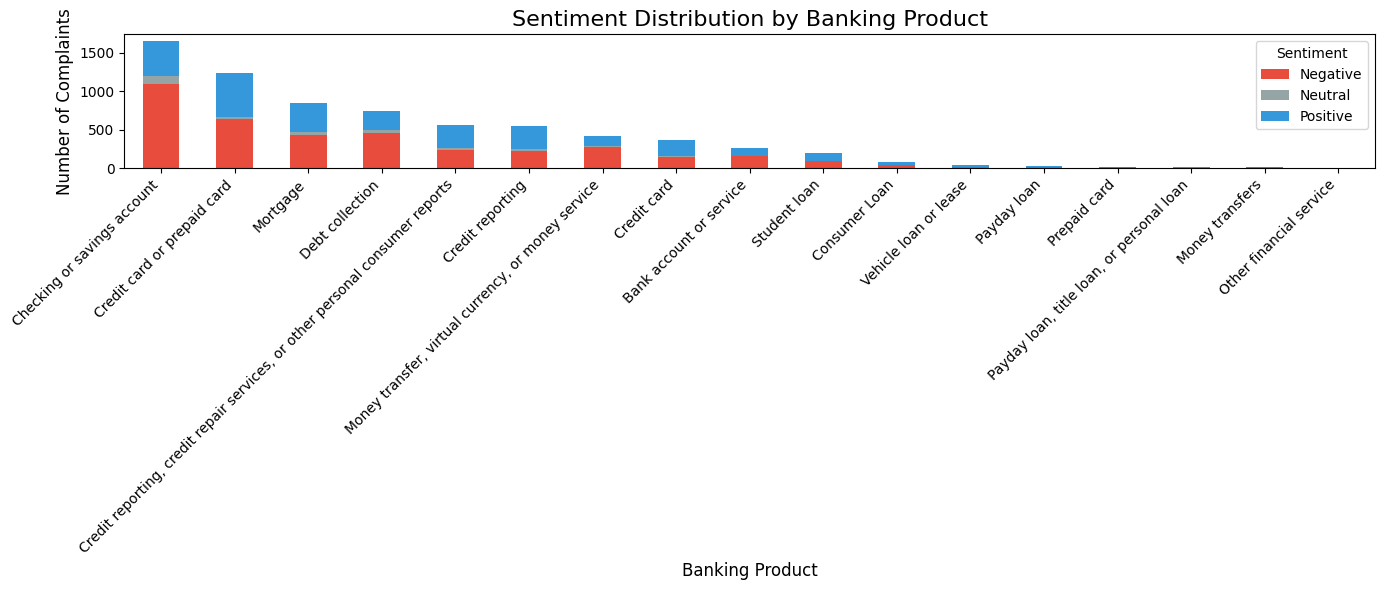

In [35]:
# Sort by total volume for better readability
sorted_df = insights.sort_values("Total", ascending=False)

# Define custom colors
colors = {
    "Negative": "#e74c3c",  # red
    "Neutral": "#95a5a6",   # gray
    "Positive": "#3498db"   # blue
}

# Plot
ax = sorted_df[["Negative", "Neutral", "Positive"]].plot(
    kind="bar",
    stacked=True,
    figsize=(14, 6),
    color=[colors["Negative"], colors["Neutral"], colors["Positive"]]
)

# Labels and formatting
plt.title("Sentiment Distribution by Banking Product", fontsize=16)
plt.ylabel("Number of Complaints", fontsize=12)
plt.xlabel("Banking Product", fontsize=12)
plt.xticks(ticks=range(len(sorted_df)), labels=sorted_df.index, rotation=45, ha="right")
plt.legend(title="Sentiment", fontsize=10)
plt.tight_layout()

# Save the figure
plt.savefig("sentiment_stacked_bar.png", dpi=300)

# Show the figure inline
plt.show()

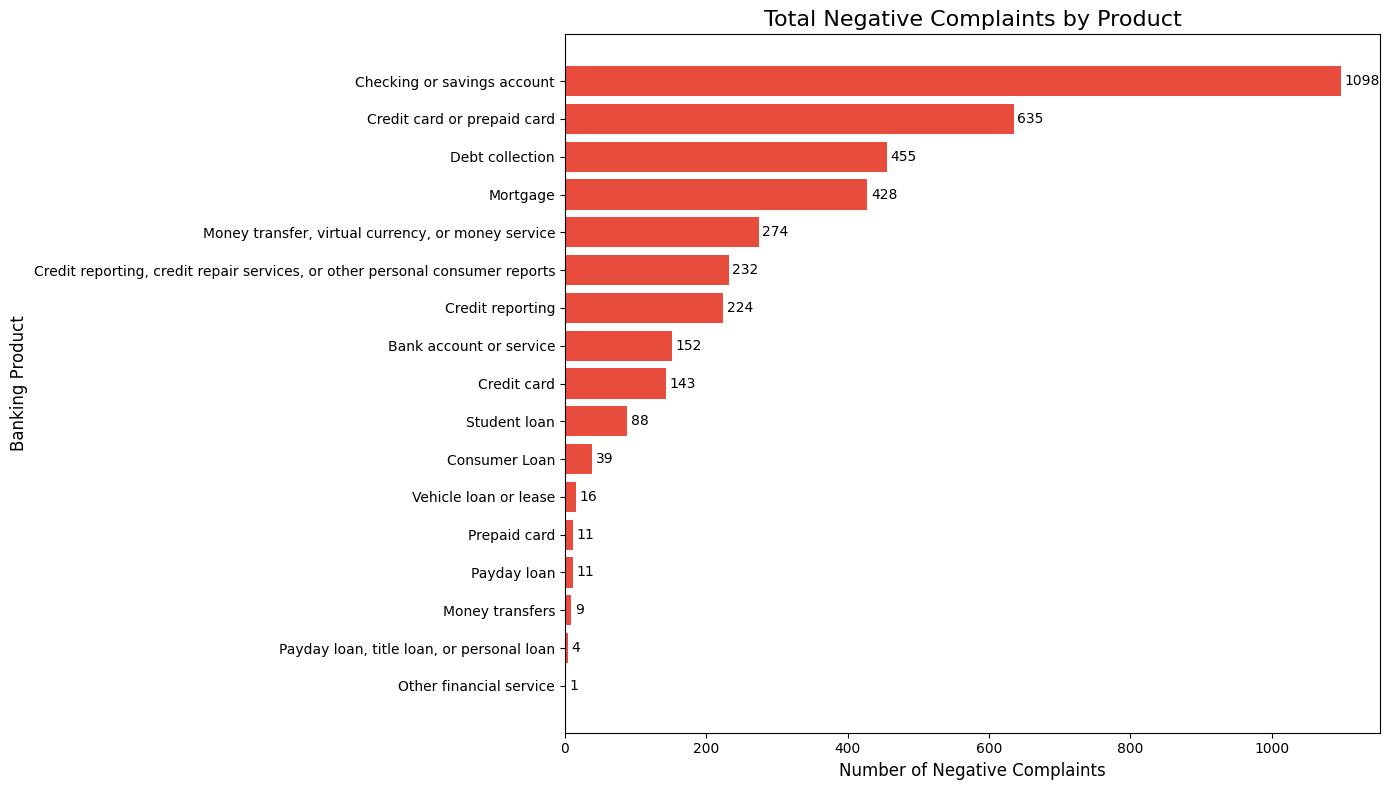

In [36]:
# Sort by raw negative complaint count
neg_sorted = insights.sort_values("Negative", ascending=True)

# Plot
plt.figure(figsize=(14, 8))
bars = plt.barh(neg_sorted.index, neg_sorted["Negative"], color="#e74c3c")

# Add count labels to each bar
for bar in bars:
    plt.text(
        bar.get_width() + 5,  # horizontal offset
        bar.get_y() + bar.get_height() / 2,  # vertical centering
        f'{int(bar.get_width())}',  # format as integer
        va='center'
    )

plt.title("Total Negative Complaints by Product", fontsize=16)
plt.xlabel("Number of Negative Complaints", fontsize=12)
plt.ylabel("Banking Product", fontsize=12)
plt.tight_layout()

# Save and show
plt.savefig("negative_count_bar.png", dpi=300)
plt.show()

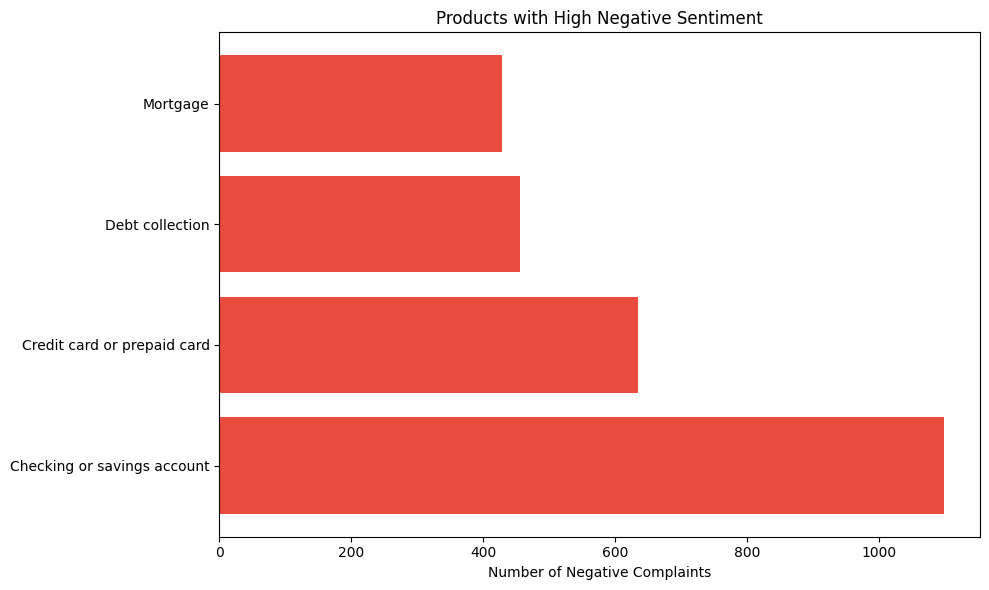

In [37]:
plt.figure(figsize=(10, 6))
plt.barh(high_negative.index, high_negative["Negative"], color="#e74c3c")
plt.xlabel("Number of Negative Complaints")
plt.title("Products with High Negative Sentiment")
plt.tight_layout()

# Save the figure
plt.savefig("high_negative_sentiment.png", dpi=300, bbox_inches='tight')

plt.show()

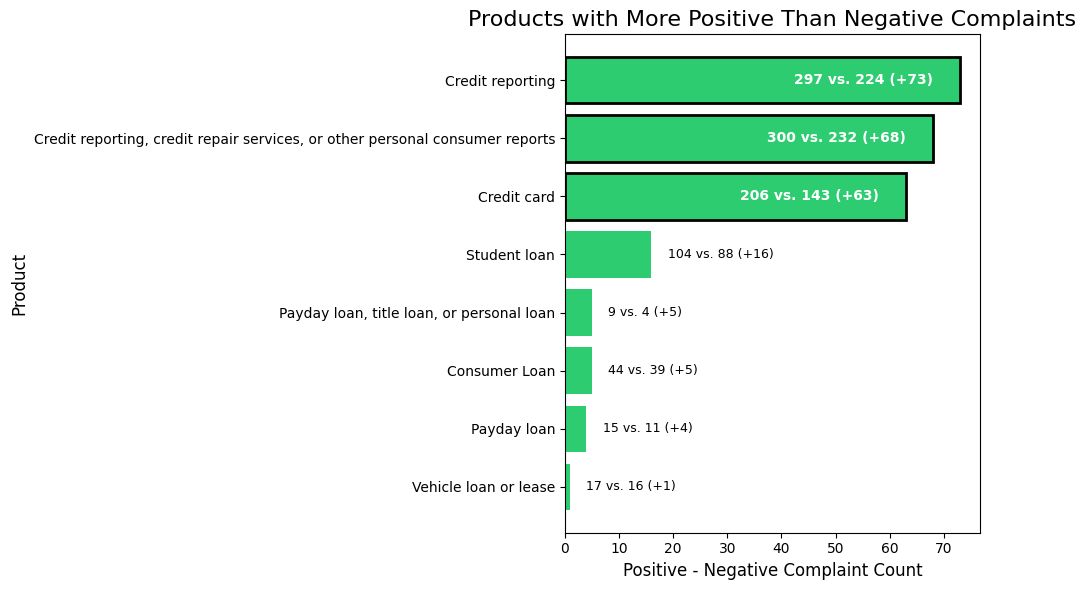

In [38]:
# Filter and prepare data
positive_over_negative = insights[insights["Positive"] > insights["Negative"]][["Positive", "Negative"]].copy()
positive_over_negative["Difference"] = positive_over_negative["Positive"] - positive_over_negative["Negative"]
positive_over_negative["Comparison"] = (
    positive_over_negative["Positive"].astype(int).astype(str) +
    " vs. " +
    positive_over_negative["Negative"].astype(int).astype(str)
)
positive_over_negative_sorted = positive_over_negative.sort_values("Difference", ascending=True)

# Define the top 3 entries to highlight
top_labels = [
    "297 vs. 224",  # +73
    "300 vs. 232",  # +68
    "206 vs. 143"   # +63
]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(
    positive_over_negative_sorted.index,
    positive_over_negative_sorted["Difference"],
    color="#2ecc71"
)

# Add labels and highlight top 3
for i, bar in enumerate(bars):
    label = positive_over_negative_sorted["Comparison"].iloc[i]
    diff = int(bar.get_width())

    if label in top_labels:
        # Text inside the bar
        plt.text(
            bar.get_width() - 5,  # slightly inside the bar
            bar.get_y() + bar.get_height() / 2,
            f'{label} (+{diff})',
            va='center',
            ha='right',
            color='white',
            fontsize=10,
            fontweight='bold'
        )
        # Add black border
        bar.set_edgecolor("black")
        bar.set_linewidth(2)
    else:
        # Text outside for others
        plt.text(
            bar.get_width() + 3,
            bar.get_y() + bar.get_height() / 2,
            f'{label} (+{diff})',
            va='center',
            ha='left',
            fontsize=9,
            color='black'
        )

plt.title("Products with More Positive Than Negative Complaints", fontsize=16)
plt.xlabel("Positive - Negative Complaint Count", fontsize=12)
plt.ylabel("Product", fontsize=12)
plt.tight_layout()

# Save the figure
plt.savefig("positive_vs_negative_complaints.png", dpi=300, bbox_inches='tight')
plt.show()

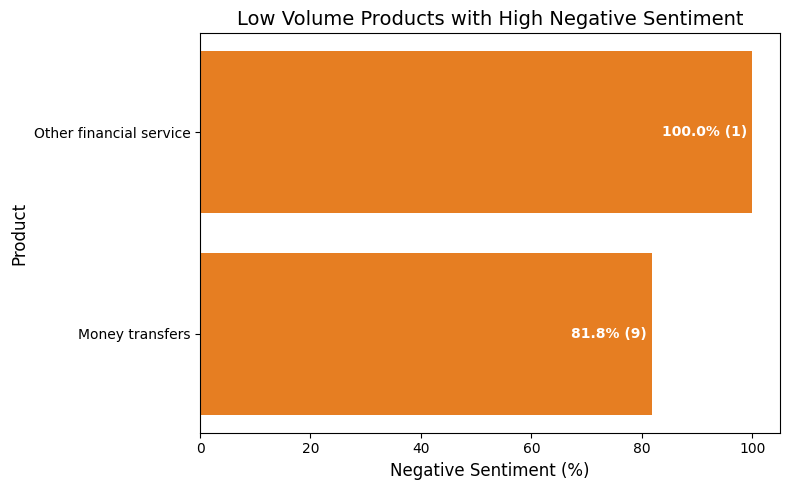

In [39]:
# Filter and prepare data
low_volume_high_neg = insights[
    (insights["Total"] <= 15) & (insights["Negative"] / insights["Total"] > 0.6)
][["Negative", "Total"]].copy()

low_volume_high_neg["Negative %"] = (low_volume_high_neg["Negative"] / low_volume_high_neg["Total"]) * 100
low_volume_high_neg_sorted = low_volume_high_neg.sort_values("Negative %", ascending=True)

# Plot
plt.figure(figsize=(8, 5))
bars = plt.barh(low_volume_high_neg_sorted.index, low_volume_high_neg_sorted["Negative %"], color="#e67e22")

# Add percentage and count labels inside the bars
for i, bar in enumerate(bars):
    percent = bar.get_width()
    count = int(low_volume_high_neg_sorted["Negative"].iloc[i])
    label = f'{percent:.1f}% ({count})'

    plt.text(
        percent - 1,  # slightly inside the bar
        bar.get_y() + bar.get_height() / 2,
        label,
        va='center',
        ha='right',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

plt.title("Low Volume Products with High Negative Sentiment", fontsize=14)
plt.xlabel("Negative Sentiment (%)", fontsize=12)
plt.ylabel("Product", fontsize=12)
plt.tight_layout()

# Save the figure
plt.savefig("low_volume_high_negative_sentiment.png", dpi=300, bbox_inches='tight')
plt.show()

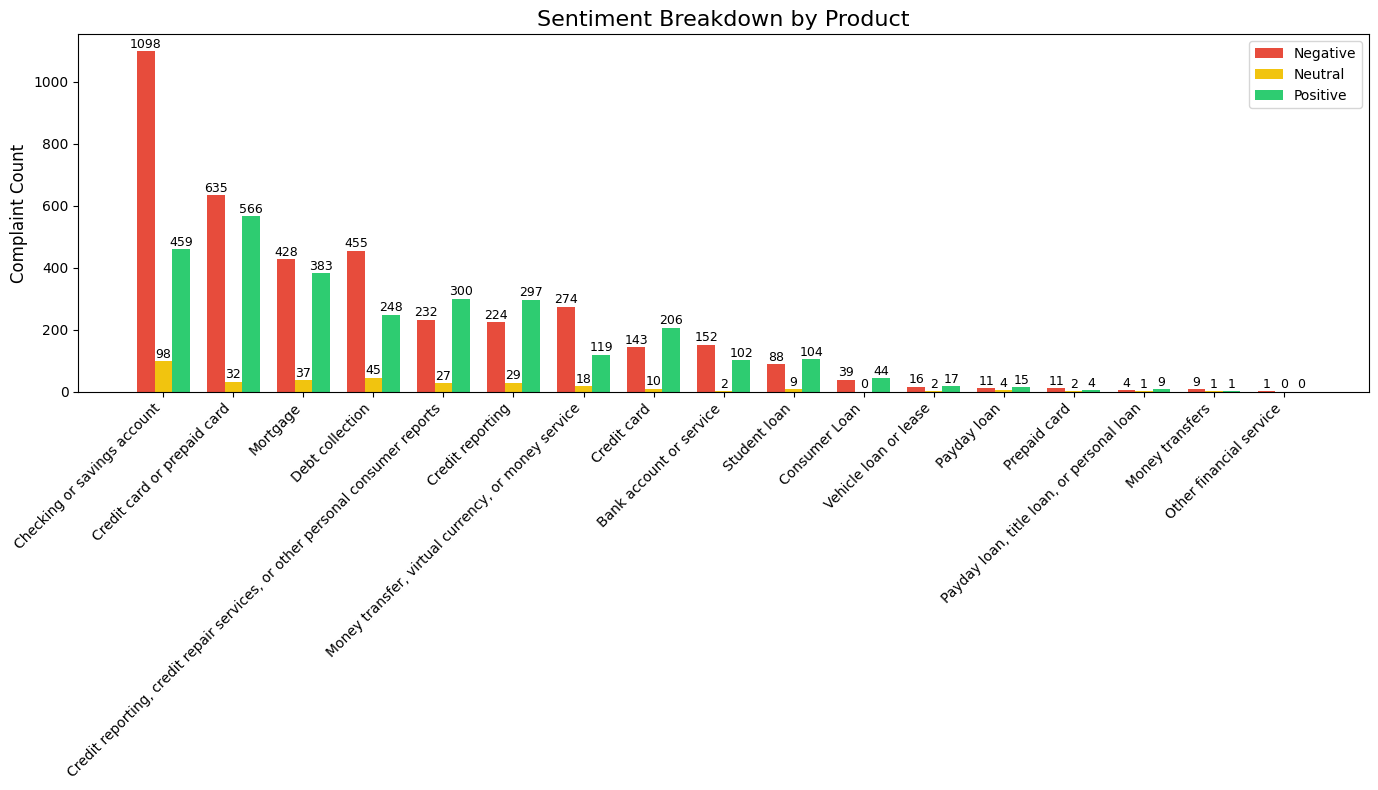

In [40]:
# Select relevant columns
sentiment_counts = insights[["Positive", "Neutral", "Negative"]].copy()

# Optional: sort by total volume
sentiment_counts["Total"] = sentiment_counts.sum(axis=1)
sentiment_counts_sorted = sentiment_counts.sort_values("Total", ascending=False)

# Setup
products = sentiment_counts_sorted.index
x = np.arange(len(products))  # positions for each product
width = 0.25  # width of each bar

# Plot
plt.figure(figsize=(14, 8))

# Bars
neg_bars = plt.bar(x - width, sentiment_counts_sorted["Negative"], width, label="Negative", color="#e74c3c")
neu_bars = plt.bar(x, sentiment_counts_sorted["Neutral"], width, label="Neutral", color="#f1c40f")
pos_bars = plt.bar(x + width, sentiment_counts_sorted["Positive"], width, label="Positive", color="#2ecc71")

# Add value labels on top of each bar
for bars in [neg_bars, neu_bars, pos_bars]:
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 1,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9
        )

# Aesthetics
plt.xticks(x, products, rotation=45, ha='right')
plt.ylabel("Complaint Count", fontsize=12)
plt.title("Sentiment Breakdown by Product", fontsize=16)
plt.legend(loc="upper right")
plt.tight_layout()

# Save the figure
plt.savefig("sentiment_breakdown_by_product.png", dpi=300, bbox_inches='tight')

plt.show()

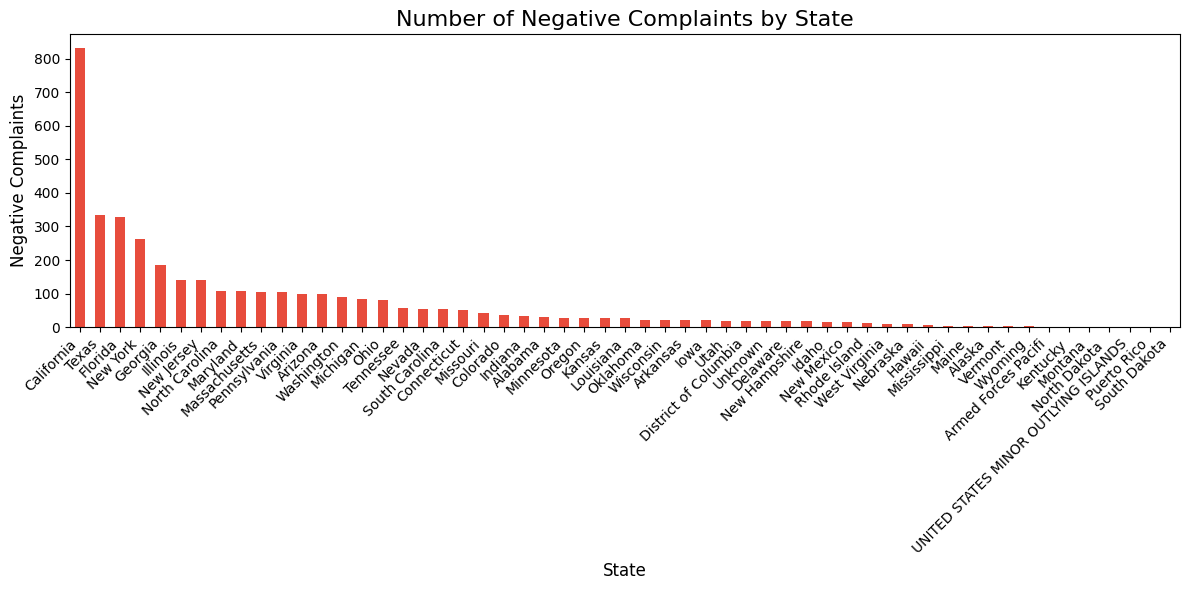

In [41]:
# Group by State and count negative complaints
state_negatives = df[df["sentiment"] == "Negative"].groupby("State").size().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
state_negatives.plot(kind="bar", color="#e74c3c")
plt.title("Number of Negative Complaints by State", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Negative Complaints", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Save the figure
plt.savefig("negative_complaints_by_state.png", dpi=300)
plt.show()

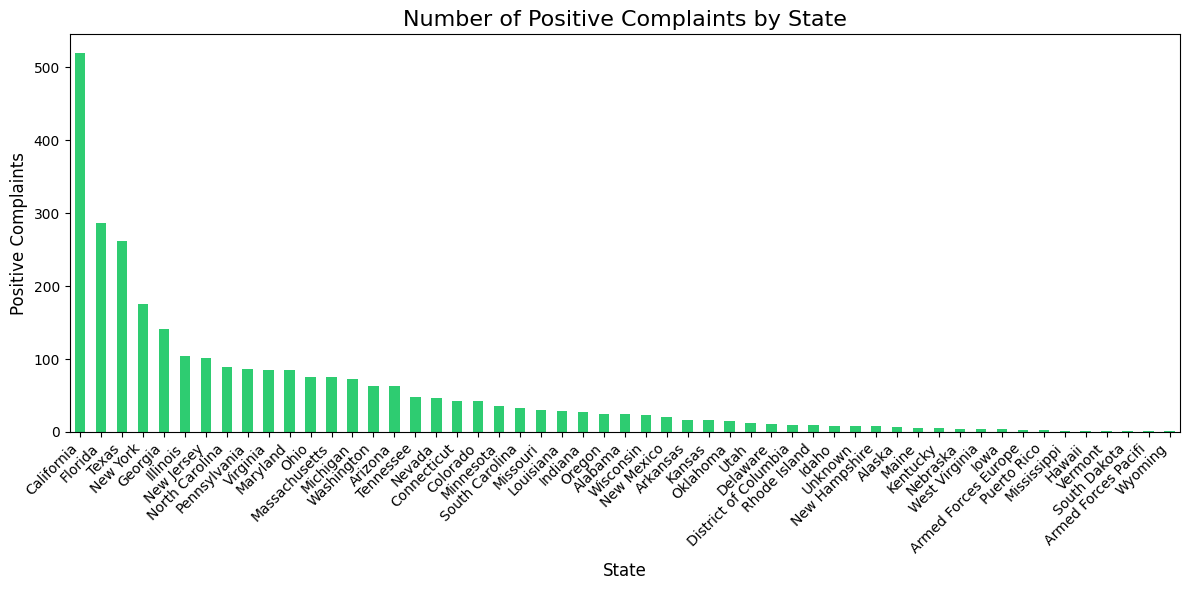

In [42]:
# Group by State and count positive complaints
state_positives = df[df["sentiment"] == "Positive"].groupby("State").size().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
state_positives.plot(kind="bar", color="#2ecc71")  # verde para positivo
plt.title("Number of Positive Complaints by State", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Positive Complaints", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Save the figure
plt.savefig("positive_complaints_by_state.png", dpi=300)
plt.show()

<Figure size 1400x700 with 0 Axes>

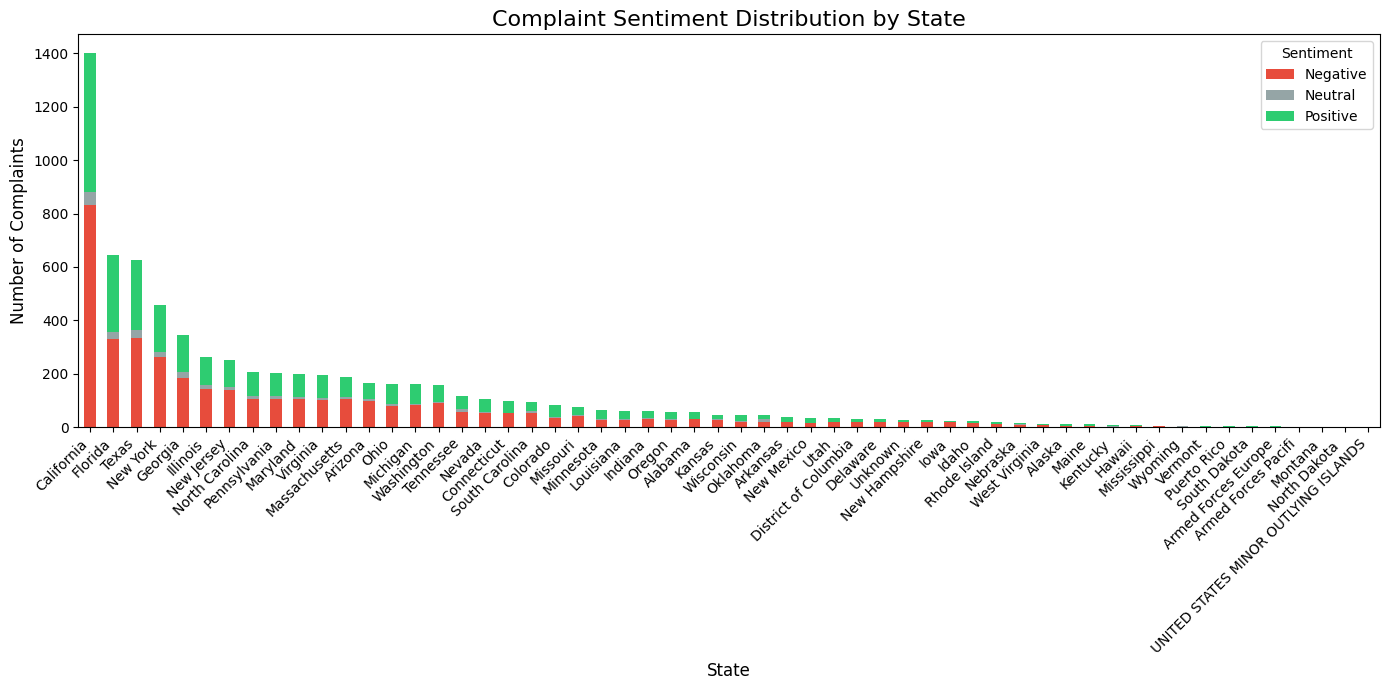

In [43]:
# Agrupar por Estado e Sentimento
state_sentiment = df.groupby(["State", "sentiment"]).size().unstack().fillna(0)

# Ordenar por total de reclamações
state_sentiment["Total"] = state_sentiment.sum(axis=1)
state_sentiment_sorted = state_sentiment.sort_values("Total", ascending=False)

# Cores personalizadas
colors = {
    "Negative": "#e74c3c",  # r
    "Neutral": "#95a5a6",   # g
    "Positive": "#2ecc71"   # g
}

# Plot
plt.figure(figsize=(14, 7))
state_sentiment_sorted[["Negative", "Neutral", "Positive"]].plot(
    kind="bar",
    stacked=True,
    color=[colors["Negative"], colors["Neutral"], colors["Positive"]],
    figsize=(14, 7)
)

# Estética
plt.title("Complaint Sentiment Distribution by State", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Complaints", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Sentiment", fontsize=10)
plt.tight_layout()

# Sve
plt.savefig("sentiment_by_state_stacked_bar.png", dpi=300)
plt.show()

# HTML/PDF Final – Banking Complaints Sentiment Analysis



In [44]:
html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Banking Complaints – Sentiment Insights Report</title>
    <style>
        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            line-height: 1.6;
            margin: 40px;
            background-color: #fdfefe;
            color: #2c3e50;
        }
        h1, h2, h3 {
            color: #2c3e50;
        }
        img {
          display: block;
          width: 100%;
          max-width: 1000px;
          height: auto;
          margin: 30px auto;
          border-radius: 8px;
          box-shadow: 0 4px 12px rgba(0,0,0,0.1);
          object-fit: contain;
        }
        .section {
            margin-bottom: 60px;
        }
        .highlight {
            background-color: #ecf0f1;
            padding: 12px 16px;
            border-left: 6px solid #3498db;
            margin-top: 10px;
            font-size: 0.95em;
        }
        ul {
            padding-left: 20px;
        }
        code {
            background-color: #f4f4f4;
            padding: 2px 6px;
            border-radius: 4px;
            font-size: 0.95em;
        }
    </style>
</head>
<body>

    <h1>Banking Complaints – Sentiment Insights Report</h1>

    <div class="section">
        <h2>Project Overview</h2>
        <p>This report analyzes customer complaints submitted to banks throughout 2023. The dataset includes over <strong>7,000 complaints</strong> across various banking products, with metadata such as complaint description, product type, date received, and customer location.</p>
    </div>

    <div class="section">
        <h2>Objective</h2>
        <p>To extract actionable insights from customer feedback using Natural Language Processing (NLP), sentiment analysis, and classification models. The goal is to help stakeholders understand pain points, regional trends, and product-specific issues.</p>
    </div>

    <div class="section">
        <h2>Data Preparation</h2>
        <ul>
            <li>Filled missing values in <code>State</code> and <code>ZIP</code> to preserve geographic data.</li>
            <li>Cleaned complaint text: lowercased, removed punctuation/numbers, stopwords, and applied lemmatization.</li>
            <li>Converted text into TF-IDF features for modeling.</li>
        </ul>
    </div>

    <div class="section">
        <h2>Modeling</h2>
        <p>Two models were trained to predict the banking product based on complaint text:</p>
        <ul>
            <li><strong>Naive Bayes</strong>: Simpler model, accuracy ~56%</li>
            <li><strong>Logistic Regression</strong>: More robust, accuracy ~70%, handles class imbalance better</li>
        </ul>
    </div>

    <div class="section">
      <h2>Sentiment Analysis with VADER</h2>
      <p>
        Applied sentiment analysis using <strong>VADER (Valence Aware Dictionary and sEntiment Reasoner)</strong>,
        a rule-based model designed for short, informal text. It’s particularly effective for analyzing customer complaints
        because it interprets:
      </p>
      <ul>
        <li>Slang and informal language</li>
        <li>Emoticons and punctuation emphasis</li>
        <li>Acronyms and negations (e.g., “not good”)</li>
      </ul>
      <p>
        The analysis was performed on the <code>complaint_description</code> column, where each entry was classified into one of three sentiment categories
        based on its <strong>compound score</strong>:
      </p>
      <ul>
        <li><strong>Positive</strong>: score ≥ 0.05 — indicates the complaint contains overall positive language or praise</li>
        <li><strong>Negative</strong>: score ≤ -0.05 — reflects dissatisfaction, frustration, or criticism</li>
        <li><strong>Neutral</strong>: between -0.05 and 0.05 — typically factual, procedural, or emotionally flat language</li>
      </ul>
      <p>
        Neutral complaints often describe a situation without expressing clear approval or disapproval — for example:
        <em>“I submitted a request and haven’t heard back”</em> or <em>“My account was closed without notice.”</em>
        These statements convey concern but lack strong emotional tone.
      </p>
      <p>
        This classification helps quantify customer sentiment and identify which banking products or regions are associated
        with more emotionally charged feedback.
      </p>
    </div>

    <div class="section">
        <h2>Visual Insights</h2>

        <h3>1. Sentiment Distribution by Product</h3>
        <img src="sentiment_stacked_bar.png" alt="Sentiment Distribution by Product">
        <div class="highlight">Shows how sentiment varies across banking products.</div>

        <h3>2. Total Negative Complaints by Product</h3>
        <img src="negative_count_bar.png" alt="Negative Complaints by Product">
        <div class="highlight">Highlights which products receive the most negative feedback.</div>

        <h3>3. Products with High Negative Sentiment</h3>
        <img src="high_negative_sentiment.png" alt="High Negative Sentiment Products">
        <div class="highlight">Focuses on products with over 400 negative complaints.</div>

        <h3>4. Products with More Positive Than Negative Complaints</h3>
        <img src="positive_vs_negative_complaints.png" alt="Positive vs Negative Comparison">
        <div class="highlight">Identifies products with stronger positive sentiment.</div>

        <h3>5. Low Volume but High Negativity</h3>
        <img src="low_volume_high_negative_sentiment.png" alt="Low Volume High Negativity">
        <div class="highlight">Flags niche products with concerning sentiment ratios.</div>

        <h3>6. Sentiment Breakdown by Product (Grouped Bars)</h3>
        <img src="sentiment_breakdown_by_product.png" alt="Grouped Sentiment Breakdown">
        <div class="highlight">Compares sentiment categories side-by-side for each product.</div>

        <h3>7. Complaint Sentiment Distribution by State</h3>
        <img src="sentiment_by_state_stacked_bar.png" alt="Sentiment by State">
        <div class="highlight">Reveals geographic concentration of negative and positive feedback.</div>
    </div>

    <div class="section">
        <h2>Business Insights</h2>
        <ul>
            <li>Products like <strong>Checking accounts</strong> and <strong>Credit cards</strong> show high complaint volumes and negative sentiment.</li>
            <li>Some products (e.g. <strong>Student loans</strong>) have more positive than negative feedback.</li>
            <li>Certain states show disproportionate negativity, which may indicate regional service issues.</li>
        </ul>
    </div>

    <div class="section">
        <h2>What I Learned</h2>
        <ul>
            <li>How to clean and preprocess text data for NLP</li>
            <li>How to apply TF-IDF and train classification models</li>
            <li>How to use VADER for sentiment analysis</li>
            <li>How to visualize and communicate insights effectively</li>
        </ul>
    </div>

    <div class="section">
      <h2>GitHub Summary</h2>
      <p>
        This project is available on
        <a href="https://github.com/cwattsnogueira/nlp-banking-insights" target="_blank">
          GitHub
        </a> and includes:
      </p>
      <ul>
        <li>Data cleaning and preprocessing scripts</li>
        <li>Model training and evaluation</li>
        <li>Sentiment analysis pipeline using VADER</li>
        <li>Insightful visualizations and business recommendations</li>
      </ul>
    </div>

    <div class="section">
      <h2>Author</h2>
      <p>
        <strong>Carllos Watts-Nogueira</strong> focused on transforming raw data into actionable business insights.
        data scientist | sentiment analysis| data visualization | stakeholder-driven reporting.
      </p>
      <ul>
        <li>
          GitHub:
          <a href="https://github.com/cwattsnogueira" target="_blank" rel="noopener noreferrer">
            github.com/cwattsnogueira
          </a>
        </li>
        <li>
          LinkedIn:
          <a href="https://www.linkedin.com/in/carlloswattsnogueira" target="_blank" rel="noopener noreferrer">
            linkedin.com/in/carlloswattsnogueira
          </a>
        </li>
      </ul>
    </div>

</body>
</html>
"""

# Save to file
with open("BankingComplaintsSentimentAnalysis.html", "w", encoding="utf-8") as f:
    f.write(html_content)

print("HTML report saved as 'BankingComplaintsSentimentAnalysis.html'. Make sure all .png files are in the same folder.")

HTML report saved as 'BankingComplaintsSentimentAnalysis.html'. Make sure all .png files are in the same folder.


In [45]:
#  convert html to pdf (colab friend)
!pip install weasyprint

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 850.6/850.6 kB 43.1 MB/s eta 0:00:00


In [46]:
from weasyprint import HTML

# Create PDF from HTML
HTML("BankingComplaintsSentimentAnalysis.html").write_pdf("BankingComplaintsSentimentAnalysis.pdf")

print("PDF report saved as 'BankingComplaintsSentimentAnalysis.pdf'.")

DEBUG:fontTools.ttLib.ttFont:Reading 'maxp' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'maxp' table
DEBUG:fontTools.subset.timer:Took 0.003s to load 'maxp'
DEBUG:fontTools.subset.timer:Took 0.000s to prune 'maxp'
INFO:fontTools.subset:maxp pruned
DEBUG:fontTools.ttLib.ttFont:Reading 'cmap' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'cmap' table
DEBUG:fontTools.ttLib.ttFont:Reading 'post' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'post' table
DEBUG:fontTools.subset.timer:Took 0.008s to load 'cmap'
DEBUG:fontTools.subset.timer:Took 0.000s to prune 'cmap'
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:fpgm dropped
INFO:fontTools.subset:prep dropped
INFO:fontTools.subset:cvt  dropped
DEBUG:fontTools.subset.timer:Took 0.000s to load 'post'
DEBUG:fontTools.subset.timer:Took 0.000s to prune 'post'
INFO:fontTools.subset:post pruned
DEBUG:fontTools.ttLib.ttFont:Reading 'glyf' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'glyf' tabl

PDF report saved as 'BankingComplaintsSentimentAnalysis.pdf'.


# Plotly + HTML

In [47]:
# Group by product and sentiment
insights_p = df.groupby(["Banking Product", "sentiment"]).size().unstack().fillna(0)
insights_p["Total"] = insights_p.sum(axis=1)

# Group by state and sentiment
state_sentiment_p = df.groupby(["State", "sentiment"]).size().unstack().fillna(0)
state_sentiment_p["Total"] = state_sentiment_p.sum(axis=1)

# Products with high negative sentiment
high_negative_p = insights_p[insights_p["Negative"] > 400].copy()

# Products with more positive than negative sentiment
positive_over_negative_p = insights_p[insights_p["Positive"] > insights_p["Negative"]].copy()
positive_over_negative_p["Difference"] = (
    positive_over_negative_p["Positive"] - positive_over_negative_p["Negative"]
)

# Low-volume products with high negativity
low_volume_high_neg_p = insights_p[
    (insights_p["Total"] <= 15) & (insights_p["Negative"] / insights_p["Total"] > 0.6)
].copy()
low_volume_high_neg_p["Negative %"] = (
    low_volume_high_neg_p["Negative"] / low_volume_high_neg_p["Total"]
) * 100

In [48]:
!pip install plotly

In [49]:
import plotly.graph_objects as go
import plotly.express as px

In [50]:
# Sentiment Distribution by Banking Product

# Reset index for clarity
insights_p_sorted = insights_p.sort_values("Total", ascending=False).reset_index()

# Define colors
colors_p = {
    "Negative": "#e74c3c",  # red
    "Neutral": "#95a5a6",   # gray
    "Positive": "#3498db"   # blue
}

# Create stacked bar chart
fig_product_sentiment_p = go.Figure()
for sentiment in ["Negative", "Neutral", "Positive"]:
    fig_product_sentiment_p.add_trace(go.Bar(
        x=insights_p_sorted["Banking Product"],
        y=insights_p_sorted[sentiment],
        name=sentiment,
        marker_color=colors_p[sentiment]
    ))

# Layout
fig_product_sentiment_p.update_layout(
    barmode="stack",
    title="Sentiment Distribution by Banking Product",
    xaxis_title="Banking Product",
    yaxis_title="Number of Complaints",
    xaxis_tickangle=-45,
    legend_title="Sentiment",
    height=600,
    margin=dict(l=60, r=40, t=60, b=120)
)

# Save as HTML
fig_product_sentiment_p.write_html("sentiment_by_product_p.html")

In [51]:
# Sentiment Distribution by State
# Reset index
state_sentiment_p_sorted = state_sentiment_p.sort_values("Total", ascending=False).reset_index()

# Create stacked bar chart
fig_state_sentiment_p = go.Figure()
for sentiment in ["Negative", "Neutral", "Positive"]:
    fig_state_sentiment_p.add_trace(go.Bar(
        x=state_sentiment_p_sorted["State"],
        y=state_sentiment_p_sorted[sentiment],
        name=sentiment,
        marker_color=colors_p[sentiment]
    ))

# Layout
fig_state_sentiment_p.update_layout(
    barmode="stack",
    title="Sentiment Distribution by State",
    xaxis_title="State",
    yaxis_title="Number of Complaints",
    xaxis_tickangle=-45,
    legend_title="Sentiment",
    height=600,
    margin=dict(l=60, r=40, t=60, b=120)
)

# Save as HTML
fig_state_sentiment_p.write_html("sentiment_by_state_p.html")

In [52]:
# Sentiment Ratio by Product
# Prepare data
sentiment_ratio_p = insights_p.copy()
sentiment_ratio_p["Positive %"] = (sentiment_ratio_p["Positive"] / sentiment_ratio_p["Total"]) * 100
sentiment_ratio_p["Negative %"] = (sentiment_ratio_p["Negative"] / sentiment_ratio_p["Total"]) * 100
sentiment_ratio_p_sorted = sentiment_ratio_p.sort_values("Negative %", ascending=False).reset_index()

# Melt for plotting
sentiment_ratio_melted_p = sentiment_ratio_p_sorted.melt(
    id_vars="Banking Product",
    value_vars=["Negative %", "Positive %"],
    var_name="Sentiment",
    value_name="Percentage"
)

# Plot
fig_ratio_p = px.bar(
    sentiment_ratio_melted_p,
    x="Percentage",
    y="Banking Product",
    color="Sentiment",
    orientation="h",
    title="Sentiment Ratio by Banking Product",
    color_discrete_map={"Negative %": "#e74c3c", "Positive %": "#2ecc71"}
)
fig_ratio_p.write_html("sentiment_ratio_by_product_p.html")

In [64]:
# Top 10 States by Negative Sentiment Rate
# Prepare data

top_negative_states_p = state_sentiment_p.sort_values("Negative", ascending=False).head(10).reset_index()

#plot
fig_top_states_p = px.bar(
    top_negative_states_p,
    x="Negative",
    y="State",
    orientation="h",
    title="Top 10 States by Number of Negative Complaints",
    color="Negative",
    color_continuous_scale="Reds",
    category_orders={"State": top_negative_states_p["State"].tolist()}
)
fig_top_states_p.write_html("top_negative_states_p.html")

In [54]:
# Complaint Volume Over Time
# Prepare data
df["Month_p"] = df["Date Received"].dt.to_period("M").astype(str)
monthly_volume_p = df.groupby("Month_p").size().reset_index(name="Complaints")

# Plot
fig_monthly_volume_p = px.line(
    monthly_volume_p,
    x="Month_p",
    y="Complaints",
    title="Monthly Complaint Volume",
    markers=True
)
fig_monthly_volume_p.update_layout(xaxis_title="Month", yaxis_title="Number of Complaints")
fig_monthly_volume_p.write_html("monthly_complaint_volume_p.html")

In [55]:
# Sentiment Over Time
monthly_sentiment_p = df.groupby(["Month_p", "sentiment"]).size().unstack().fillna(0).reset_index()

# Melt for multi-line plot
monthly_sentiment_melted_p = monthly_sentiment_p.melt(
    id_vars="Month_p",
    value_vars=["Negative", "Neutral", "Positive"],
    var_name="Sentiment",
    value_name="Count"
)

# Plot
fig_sentiment_time_p = px.line(
    monthly_sentiment_melted_p,
    x="Month_p",
    y="Count",
    color="Sentiment",
    title="Sentiment Trends Over Time",
    markers=True,
    color_discrete_map={"Negative": "#e74c3c", "Neutral": "#95a5a6", "Positive": "#2ecc71"}
)
fig_sentiment_time_p.update_layout(xaxis_title="Month", yaxis_title="Complaint Count")
fig_sentiment_time_p.write_html("sentiment_trends_over_time_p.html")

In [56]:
# Treemap of Complaint Volume by Product
fig_treemap_p = px.treemap(
    insights_p.reset_index(),
    path=["Banking Product"],
    values="Total",
    title="Complaint Volume by Product",
    color="Total",
    color_continuous_scale="Blues"
)
fig_treemap_p.write_html("complaint_treemap_by_product_p.html")

In [57]:
# Pie Chart of Overall Sentiment Distribution
overall_sentiment_p = df["sentiment"].value_counts().reset_index()
overall_sentiment_p.columns = ["Sentiment", "Count"]

fig_pie_sentiment_p = px.pie(
    overall_sentiment_p,
    names="Sentiment",
    values="Count",
    title="Overall Sentiment Distribution",
    color="Sentiment",
    color_discrete_map={"Negative": "#e74c3c", "Neutral": "#95a5a6", "Positive": "#2ecc71"}
)
fig_pie_sentiment_p.write_html("overall_sentiment_pie_p.html")

In [58]:
# Bubble Chart — Product vs. Volume vs. Negativity
bubble_data_p = insights_p.copy().reset_index()
bubble_data_p["Negative %"] = (bubble_data_p["Negative"] / bubble_data_p["Total"]) * 100

fig_bubble_p = px.scatter(
    bubble_data_p,
    x="Negative %",
    y="Total",
    size="Negative",
    color="Negative %",
    hover_name="Banking Product",
    title="Product Risk Bubble Chart",
    color_continuous_scale="Reds",
    size_max=60
)
fig_bubble_p.update_layout(xaxis_title="Negative Sentiment (%)", yaxis_title="Total Complaints")
fig_bubble_p.write_html("product_risk_bubble_p.html")

In [59]:
# html

final_html_p = """
<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<title>Banking Complaints – Sentiment Insights Dashboard</title>
<style>
body {
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
  margin: 40px;
  background-color: #fdfefe;
  color: #2c3e50;
}
h1, h2, h3 {
  color: #2c3e50;
}
.section {
  margin-bottom: 60px;
}
iframe {
  width: 100%;
  height: 600px;
  border: none;
  border-radius: 8px;
  box-shadow: 0 4px 12px rgba(0,0,0,0.1);
}
.highlight {
  background-color: #ecf0f1;
  padding: 12px 16px;
  border-left: 6px solid #3498db;
  margin-top: 10px;
  font-size: 0.95em;
}
</style>
</head>
<body>

<h1>Banking Complaints – Sentiment Insights Dashboard</h1>

<div class="section">
<h2>Overview</h2>
<p>This dashboard presents a comprehensive analysis of customer complaints submitted to banks in 2023. Using Natural Language Processing and sentiment analysis, we uncover patterns across products, regions, and time to support strategic decisions.</p>
</div>

<div class="section">
<h2>1. Overall Sentiment Distribution</h2>
<iframe src="overall_sentiment_pie_p.html"></iframe>
<div class="highlight">Quick snapshot of how customers feel across all complaints.</div>
</div>

<div class="section">
<h2>2. Sentiment Distribution by Banking Product</h2>
<iframe src="sentiment_by_product_p.html"></iframe>
<div class="highlight">Shows how sentiment varies across different banking products.</div>
</div>

<div class="section">
<h2>3. Sentiment Ratio by Product</h2>
<iframe src="sentiment_ratio_by_product_p.html"></iframe>
<div class="highlight">Highlights the percentage of positive vs. negative sentiment per product.</div>
</div>

<div class="section">
<h2>4. Complaint Volume by Product (Treemap)</h2>
<iframe src="complaint_treemap_by_product_p.html"></iframe>
<div class="highlight">Visual hierarchy of complaint volume across products.</div>
</div>

<div class="section">
<h2>5. Product Risk Bubble Chart</h2>
<iframe src="product_risk_bubble_p.html"></iframe>
<div class="highlight">Combines volume and negativity to identify high-risk products.</div>
</div>

<div class="section">
<h2>6. Sentiment Distribution by State</h2>
<iframe src="sentiment_by_state_p.html"></iframe>
<div class="highlight">Shows how sentiment varies geographically across the U.S.</div>
</div>

<div class="section">
<h2>7. Top 10 States by Negative Sentiment Rate</h2>
<iframe src="top_negative_states_p.html"></iframe>
<div class="highlight">Identifies regions with the highest proportion of negative feedback.</div>
</div>

<div class="section">
<h2>8. Monthly Complaint Volume</h2>
<iframe src="monthly_complaint_volume_p.html"></iframe>
<div class="highlight">Tracks how complaint volume changes over time.</div>
</div>

<div class="section">
<h2>9. Sentiment Trends Over Time</h2>
<iframe src="sentiment_trends_over_time_p.html"></iframe>
<div class="highlight">Reveals how customer sentiment evolves month by month.</div>
</div>

<div class="section">
<h2>Business Insights</h2>
<ul>
  <li>Products like <strong>Checking accounts</strong> and <strong>Credit cards</strong> show high complaint volume and negative sentiment.</li>
  <li>Some products (e.g. <strong>Student loans</strong>) have more positive than negative feedback, indicating good service or resolution.</li>
  <li>States like <strong>California</strong> and <strong>Florida</strong> show elevated negativity, suggesting regional service issues.</li>
  <li>Complaint volume spikes in certain months may reflect policy changes or seasonal demand.</li>
</ul>
</div>

<div class="section">
<h2>Author</h2>
<p><strong>Carllos Watts-Nogueira</strong> – Data Scientist focused on transforming raw feedback into actionable insights.</p>
<ul>
  <li>GitHub: <a href="https://github.com/cwattsnogueira" target="_blank">github.com/cwattsnogueira</a></li>
  <li>LinkedIn: <a href="https://www.linkedin.com/in/carlloswattsnogueira" target="_blank">linkedin.com/in/carlloswattsnogueira</a></li>
</ul>
</div>

</body>
</html>
"""

# Save to file
with open("banking_sentiment_dashboard_p.html", "w", encoding="utf-8") as f:
    f.write(final_html_p)

# Final Technical Report – Banking Complaints Sentiment Analysis

1. Project Overview

This project analyzes over 7,000 customer complaints submitted to U.S. banks in 2023. The goal is to extract actionable insights using Natural Language Processing (NLP), sentiment analysis, and classification models. The dataset includes complaint descriptions, product types, submission dates, and geographic metadata.

2. Data Cleaning & Preprocessing

- Missing values in State and ZIP were filled with "Unknown" and "00000" respectively to preserve geographic granularity.
- Complaint descriptions were cleaned using a custom preprocessing pipeline:
- Lowercasing
- Removal of numbers and punctuation
- Tokenization
- Stopword removal
- Lemmatization using WordNet
- Cleaned text was stored in a new column Complaint_Clean.

3. Feature Engineering

- A TF-IDF vectorizer was applied to the cleaned complaint text, extracting up to 5,000 features.
- These features were used to train classification models to predict the Banking Product associated with each complaint.

4. Classification Models

Two models were trained and evaluated:

Naive Bayes
- Accuracy: ~56%
- Strengths: Fast, interpretable
- Weaknesses: Poor handling of class imbalance

Logistic Regression
- Accuracy: ~70%
- Strengths: Better generalization, handles imbalance with class_weight='balanced'
- Weaknesses: Requires more training time

Confusion matrices were plotted for both models to visualize prediction performance across product categories.

5. Sentiment Analysis with VADER

- VADER (Valence Aware Dictionary and sEntiment Reasoner) was used to classify each complaint into:
- Positive (compound ≥ 0.05)
- Negative (compound ≤ -0.05)
- Neutral (otherwise)
- VADER is ideal for short, informal text and handles slang, acronyms, and punctuation effectively.
- Sentiment scores were applied directly to the raw Complaint Description column.

6. Business Insights

Using grouped aggregations and sentiment breakdowns, several insights were extracted:

- Products with high negative sentiment (e.g., Checking Accounts, Credit Cards)
- Products with more positive than negative feedback (e.g., Student Loans)
- Low-volume products with disproportionately high negativity
- States with elevated negative sentiment (e.g., California, Florida)
- Monthly trends in complaint volume and sentiment shifts

7. Visualizations

Both static (matplotlib) and interactive (Plotly) visualizations were created to support storytelling:

- Stacked bar charts by product and state
- Sentiment ratio comparisons
- Treemaps and bubble charts for product risk
- Line charts for monthly trends
- Pie chart for overall sentiment distribution

All Plotly charts were exported as standalone HTML files and embedded into a final dashboard.

8. Final Deliverables

- Cleaned dataset with sentiment labels: banking_complaints_2023_sentiment.csv
- Trained models: nb_model.pkl
- Static report: BankingComplaintsSentimentAnalysis.html and PDF version
- Interactive dashboard: banking_sentiment_dashboard_p.html
- Markdown summary: sentiment_insights.md